# First Neural Network

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
rand_a = np.random.uniform(0,100,(5,5))

In [4]:
rand_a

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [5]:
rand_b = np.random.uniform(0,100,(5,1))

In [6]:
rand_b

array([[ 99.43179012],
       [ 52.06653967],
       [ 57.87895355],
       [ 73.48190583],
       [ 54.19617722]])

In [7]:
# placeholders

a=tf.placeholder(tf.float32)
b=tf.placeholder(tf.float32)

In [8]:
#tf.add
#tf.multiply

add_op = a+b

In [9]:
mul_op = a * b

In [10]:
with tf.Session() as sess:
    add_result = sess.run(add_op,feed_dict={a:10,b:20})  #feed dict to provide input to placeholders
    print(add_result)

30.0


In [11]:
with tf.Session() as sess:
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    print('\nadd above ... below is multiply\n')
    mult_result = sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})
    print(mult_result)

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]

add above ... below is multiply

[[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


## Now Let's begin

In [12]:
n_features = 10        #number of features
n_dense_neurons = 3      #no. of neurons in one layer here

In [15]:
x = tf.placeholder(tf.float32,(None,n_features))  # no of rows indefinite(None), features = 10

In [16]:
w= tf.Variable(tf.random_normal([n_features,n_dense_neurons]))   # random normal distribution and [] matrix shape

b = tf.Variable(tf.ones([n_dense_neurons]))    # Currently =1 Other matrix for multiplying  wX

In [17]:
xw = tf.matmul(x,w)      #for w x + b using tensorflow functions is better

In [18]:
 z = tf.add(xw,b)            # z= wx+b   tf. funcions used so that it identifies

In [19]:
a = tf.sigmoid(z)      # using sigmoid activation function tanh,tf.nn.relu - rectified linear unit

In [20]:
init = tf.global_variables_initializer()    # varibales need to be initialized

In [21]:
with tf.Session() as sess:        # session creation
    sess.run(init)           #initialization 
                               #result of each of those neurons a is feeded data by feed_dict
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [22]:
print(layer_out)

[[ 0.19592889  0.84230143  0.36188066]]


## Simple Regression Example

In [23]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [24]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [27]:
y_label

array([ 0.5420333 ,  1.17575569,  0.85241231,  2.50514314,  4.67005971,
        4.41685654,  6.66701681,  6.69180648,  7.54731409,  9.03483077])

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

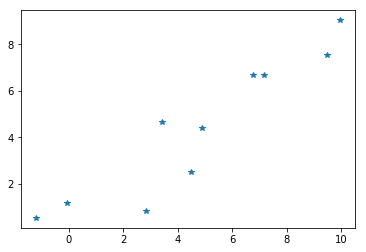

In [32]:
plt.plot(x_data,y_label,'*')

#Start making neural network  y = mx + b



In [34]:
np.random.rand(2)

array([ 0.94926413,  0.47816742])

In [35]:
m = tf.Variable(0.94)
b = tf.Variable(0.47)       #chosen two values at super random

In [37]:
error = 0            #initially taken zero

for x,y in zip(x_data,y_label):
    
    y_hat = m*x +b
    
    error += (y - y_hat)**2

In [38]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [39]:
init = tf.global_variables_initializer()

In [44]:
with tf.Session() as sess:
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        sess.run(train)
        final_slope , final_intercept = sess.run([m,b])

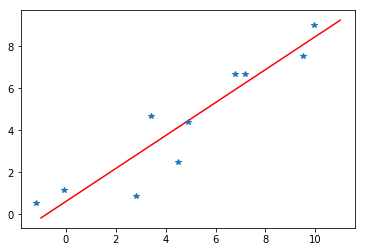

In [45]:
x_test = np.linspace(-1,11,10)    #providing test data

#y = mx+b
y_pred_plot = final_slope* x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')